<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas #libreria para manejar tablas
import numpy
import seaborn #libreria para visualizacion

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [5]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

# Ejercicios

## Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año.


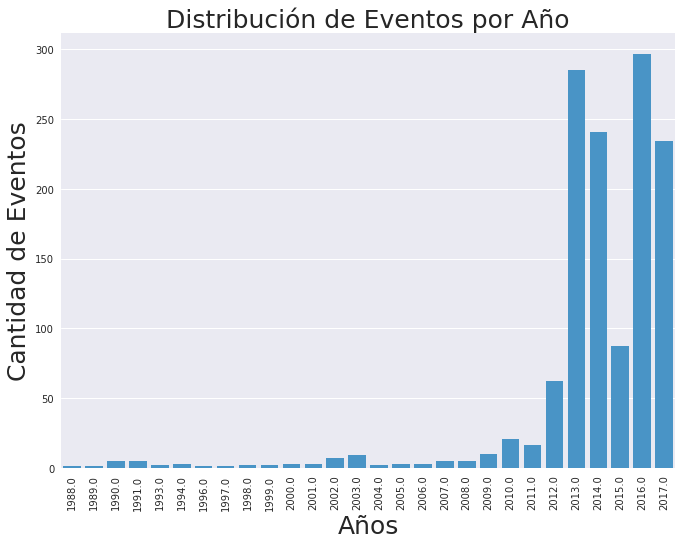

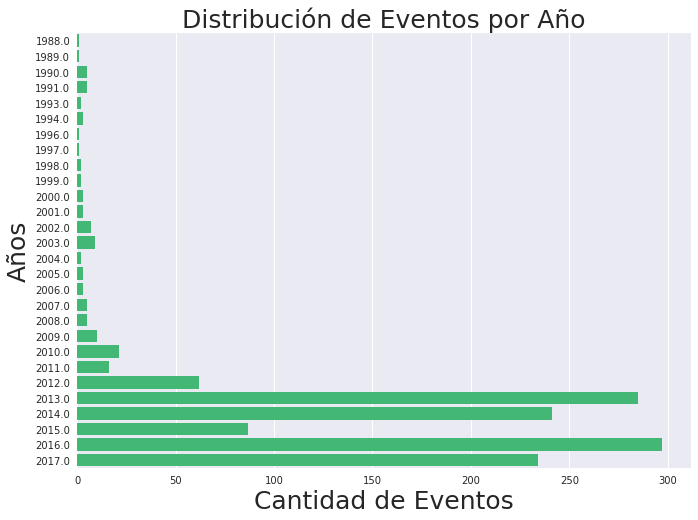

In [8]:
#Importamos la librería matplotlib para poder manejar las caracteristicas estéticas de las imágenes
import matplotlib.pyplot as plt

#Opción 1
plt.figure()
countvalues = dataset.year.dropna() 
ax = seaborn.countplot(countvalues,color='#3498db') #Color Azul
seaborn.set(rc={'figure.figsize':(11,8)}) #Ajusto el tamaño de la figura
plt.xticks(rotation=90)
ax.set_title("Distribución de Eventos por Año",fontsize=25)
ax.set_xlabel("Años",fontsize=25)
ax.set_ylabel("Cantidad de Eventos",fontsize=25)
seaborn.despine()

#Opción 2
plt.figure()
ax = seaborn.countplot(y="year",data=dataset,color='#2ecc71') #Color Verde
seaborn.set(rc={'figure.figsize':(11,8)}) #Ajusto el tamaño de la figura
seaborn.despine()
ax.set_title("Distribución de Eventos por Año",fontsize=25)
ax.set_xlabel("Cantidad de Eventos",fontsize=25)
ax.set_ylabel("Años",fontsize=25)
seaborn.despine()

### ACLARACIÓN:

#### El gráfico de barras vertical (figura azul) puede llegar a generar confusión, tal y como se advirtió en la clase teórica, debido a que el ser humano aprecia mejor los datos cuando el flujo de visión es horizontal y no vertical. Por lo tanto, se elige también mostrar el gráfico de barras de manera horizontal (figura verde), el cual cumple mejor con el precepto de horizontalidad.

#### Por otra parte, el gráfico de torta no se utilizó debido a la gran cantidad de información que se desea mostrar. Este tipo de gráficos genera confusión cuando la cantidad de datos es muy grande, ya que no se pueden distinguir bien las diferentes 'porciones' de la torta y pueden generar una mala interpretación de los datos, debido a que el ser humano no distingue bien los ángulos.

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’.

$$fdp(Y)$$

In [9]:
fdp_Y = dataset.year.value_counts(normalize=True)

print("Tabla de Frecuencia de Probabilidades:\n")
print("Años: \t  Probabilidades:")
print(fdp_Y)

Tabla de Frecuencia de Probabilidades:

Años: 	  Probabilidades:
2016.0    0.225684
2013.0    0.216565
2014.0    0.183131
2017.0    0.177812
2015.0    0.066109
2012.0    0.047112
2010.0    0.015957
2011.0    0.012158
2009.0    0.007599
2003.0    0.006839
2002.0    0.005319
2007.0    0.003799
1990.0    0.003799
2008.0    0.003799
1991.0    0.003799
2000.0    0.002280
1994.0    0.002280
2006.0    0.002280
2005.0    0.002280
2001.0    0.002280
1993.0    0.001520
1998.0    0.001520
2004.0    0.001520
1999.0    0.001520
1989.0    0.000760
1996.0    0.000760
1997.0    0.000760
1988.0    0.000760
Name: year, dtype: float64


* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

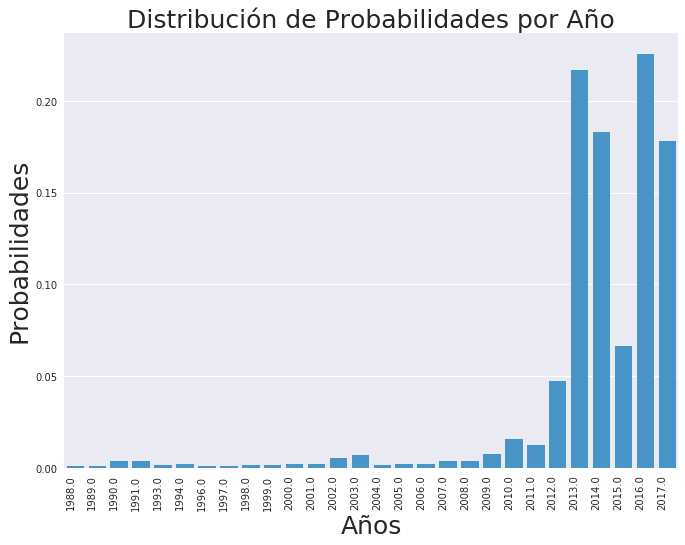

In [10]:
plt.figure()
ax = seaborn.barplot(data=fdp_Y.to_frame().reset_index(),
    x='index', y='year', color='#3498db')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
seaborn.set(rc={'figure.figsize':(11,8)}) #Ajusto el tamaño de la figura
ax.set_title("Distribución de Probabilidades por Año",fontsize=25)
ax.set_xlabel("Años",fontsize=25)
ax.set_ylabel("Probabilidades",fontsize=25)
seaborn.despine()

#### No, los gráficos no son exactamente iguales, ya que en el gráfico de distribución de eventos se muestra una cuenta de la cantidad de eventos acontecidos para cada uno de los años. En cambio, en la gráfica de distribución de probabilidades, $fdp(Y)$ se muestra la probabilidad de acontecimiento de un evento, para cada uno de los años (observar el eje de ordenadas de ambos gráficos para notar que no son los mismos).

#### Por lo tanto, resulta más útil la gráfica de distribución de probabilidades, ya que tenemos una medida relativa a la cantidad total de eventos acontecidos y no un valor absoluto de la cantidad de eventos, como en el caso de distribución de eventos.

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

#### A priori, observando los datos, uno puede cometer el error de decir que la "violencia institucional muestra una tendencia a la alza en los últimos años", sin embargo ésto no es la realidad objetiva de los datos. 

#### Lo que sucede son dos cosas, en primer lugar: sí, se observa un aumento en la violencia institucional. En segundo lugar, ésta escalada no se debe en su totalidad a un aumento "real" de la violencia, ya que lo mismo puede estar relacionado a un mayor índice de denuncias de dichos eventos. Para dejar el concepto en claro, por ejemplo, puede ser que en los años 80 la violencia haya sido la misma que la regristrada en la actualidad, sin embargo la gente no realizaba las denuncias pertinentes o al menos no podemos conocer esa información.

#### Por lo tanto, no podemos afirmar, sin faltar a la verdad "que estamos en tiempos de mayor violencia institucional" sin tener en cuenta que también nos encontramos en un contexto de "mayor consciencia colectiva" y por ende de mayores "índices de denuncia". Por lo cual, se extrae como conclusión, que en realidad lo que si podemos afirmar es que las "denuncias de violencia institucional han aumentado en los últimos años", que no es lo mismo que decir que "la violencia institucional ha aumentado en los últimos años". 


* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

<Figure size 792x576 with 0 Axes>

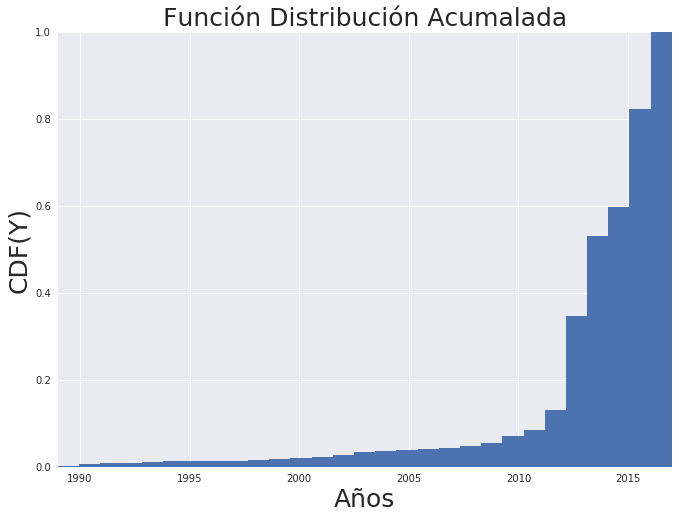

In [11]:
# Plot the CDF
plt.figure()
ax = dataset.plot(y='year', kind='hist', bins=30, cumulative=True, density=True, legend=False)
seaborn.set(rc={'figure.figsize':(11,8)}) #Ajusto el tamaño de la figura
ax.set_title("Función Distribución Acumalada",fontsize=25)
ax.set_xlabel("Años",fontsize=25)
ax.set_ylabel("CDF(Y)",fontsize=25)
ax.axis([1989,2017,0,1])
seaborn.despine()

#### La función de distribución acumulada se define matemáticamente como:
$$CDF(x) = \sum_{x_i \leq x} P(X=x_i) = \sum_{x_i \leq x} p(x_i)=P(X \leq x)$$

#### Siendo $p(x_i)$ la distribución de probabilidad y $x_i$ los distintos años, además considerando como nuestro evento de interés como "un acto de violencia antes del último cambio de gobierno (Diciembre de 2015)", podemos reescribir la ecuación anterior como:

#### $CDF(x) = \sum_{x_i \leq 2015} p(x_i) = 0.066109+0.183131+0.216565+0.047112+0.012158+0.015957+0.007599+0.003799+0.003799+0.002280+0.002280+0.001520+0.006839+0.005319+0.002280+0.002280+0.001520+0.001520+0.000760+0.000760+0.002280+0.001520+0.003799+0.003799+0.000760+0.000760 = 0.596505$

#### Por lo tanto la probabilidad de que haya ocurrido un acto de violencia, antes del último cambio de gobierno (Dic. 2015) es de $\sim 60 \%$. Si observamos la figura anterior podemos corroborar el resultado teórico obtenido.

* IMPORTANTE: ¿Qué hacemos con los datos faltantes?

#### Lo que podemos hacer con los datos faltantes es suponer que tienen un valor de 0, sin embargo lo que se suele hacer comúnmente es filtrar dichos valores y trabajar sólo con aquellos datos que están completos.

#### Con Pandas, podemos usar el método DataFrame.dropna() para eliminar filas o columnas. El comportamiento predeterminado es eliminar las filas que tienen NaN en cualquiera de las columnas. De ésta manera estamos realizando un filtrado de los datos faltantes.

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

In [12]:
fdp_X = dataset.provincia.value_counts(normalize=True)
print("Tabla de Frecuencia de Probabilidades:\n")
print("Provincias: \t\t  Probabilidades:")
print(fdp_X)

Tabla de Frecuencia de Probabilidades:

Provincias: 		  Probabilidades:
Buenos Aires              0.693182
Ciudad de Buenos Aires    0.083097
Córdoba                   0.036932
Chubut                    0.026278
Chaco                     0.020597
Rio Negro                 0.019176
Neuquen                   0.014915
Santa Fe                  0.014205
Mendoza                   0.012074
Salta                     0.012074
Misiones                  0.007812
La Pampa                  0.007102
Formosa                   0.007102
Tucuman                   0.007102
Santiago del Estero       0.007102
Jujuy                     0.006392
Entre Rios                0.006392
La Rioja                  0.004261
Corrientes                0.003551
San Luis                  0.002841
Santa Cruz                0.002841
San Juan                  0.002131
Tierra del Fuego          0.001420
Catamarca                 0.001420
Name: provincia, dtype: float64


* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

#### Sería necesario mostrar la cantidad de habitantes por provincia, para tener una medida más acorde de la probabilidad en relación a la densidad demográfica de cada una de ellas y no generar una confusión en el lector (ó mala interpretación de la información). 

#### Por ejemplo, si uno observa los datos, puede decir que la provincia de Buenos Aires es por lejos la provincia con más casos de violencia institucional, sin embargo se debe tener en cuenta que la misma posee una cantidad de habitantes mucho mayor que cualquiera de las otras provincias, por lo que resulta lógico que tenga una mayor probabilidad del evento. 

* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

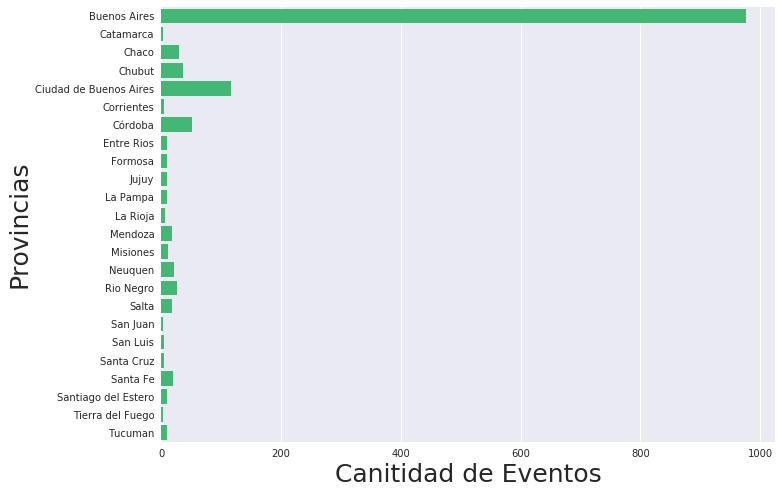

In [13]:
ax = seaborn.countplot(y="provincia",data=dataset.sort_values(by='provincia'),color='#2ecc71')
seaborn.set(rc={'figure.figsize':(12,9)}) #Ajusto el tamaño de la figura
ax.set_xlabel("Canitidad de Eventos",fontsize=25)
ax.set_ylabel("Provincias",fontsize=25)
seaborn.despine()

#### El gráfico de barras horizontales es una buena manera de representar la información de distribución de eventos, con el detalle de que una gráfica horizontal es mejor percibida que una vertical. Además, se reordenaron las provincias de manera alfabética ascendente.

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

In [14]:
tabla = pandas.crosstab(index=dataset['provincia'],columns=dataset['year'],margins=True,normalize=True)
tabla.to_csv('tabla_de_doble_entrada_XY.csv')
tabla

year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,All
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.000000,0.000766,0.000000,0.002299,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,...,0.003065,0.006130,0.006897,0.016092,0.150192,0.125670,0.037548,0.178544,0.143295,0.685057
Catamarca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000766
Chaco,0.000000,0.000000,0.003065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005364,0.006130,0.002299,0.002299,0.002299,0.000766,0.022222
Chubut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002299,0.000000,0.002299,0.004598,0.006897,0.001533,0.001533,0.005364,0.026054
Ciudad de Buenos Aires,0.000766,0.000000,0.000000,0.001533,0.000000,0.000000,0.000766,0.000766,0.000766,0.000000,...,0.003831,0.000766,0.001533,0.007663,0.017625,0.018391,0.007663,0.008429,0.009195,0.085824
Corrientes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001533,0.000000,0.000766,0.000766,0.000000,0.003065
Córdoba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001533,0.002299,0.003065,0.003831,0.003065,0.009962,0.008429,0.007663,0.039847
Entre Rios,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000766,0.000000,0.006130,0.000000,0.000000,0.000000,0.006897
Formosa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002299,0.002299,0.000766,0.000766,0.000766,0.007663


#### La tabla es demasiado grande para ser vista completamente en ésta notebook, por ello se la exportó a un archivo llamado 'tabla_de_doble_entrada_XY.csv'

In [15]:
import scipy.stats as stats

#Chi-Squared Test of Independence
tabla_sinmarg = pandas.crosstab(index=dataset['provincia'],columns=dataset['year'],margins=False,normalize=True)
g, p, dof, expctd = stats.chi2_contingency(observed=tabla_sinmarg)

print("\nTest Chi-Cuadrado:")
print("\nEl valor de chi2 = "+str(g))
print("El valor de p = "+str(p))


Test Chi-Cuadrado:

El valor de chi2 = 1.9515270048123126
El valor de p = 1.0


#### Para responder con rigor científico la cuestión de existencia de asociación o no entre los eventos, efectuaremos un constraste de hipótesis mediante la prueba de Chi-Cuadrado ($\chi^2$). Para ello vamos a admitir un nivel de significación, $\alpha=0.05$ y  una hipótesis $H_0=$ "los eventos son independientes".

#### Si el valor $p<\alpha \;\; \Longrightarrow \;\; Rechazo \;\ H_0$
#### Si el valor $p>\alpha \;\; \Longrightarrow \;\; H_0$

#### El test Chi-Cuadrado dió como resultado un valor del parámetro, $p=1>0.05$, por lo tanto no se rechaza la hipótesis de independencia. En consecuencia, estamos en presencia de eventos independientes.

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.

<Figure size 864x648 with 0 Axes>

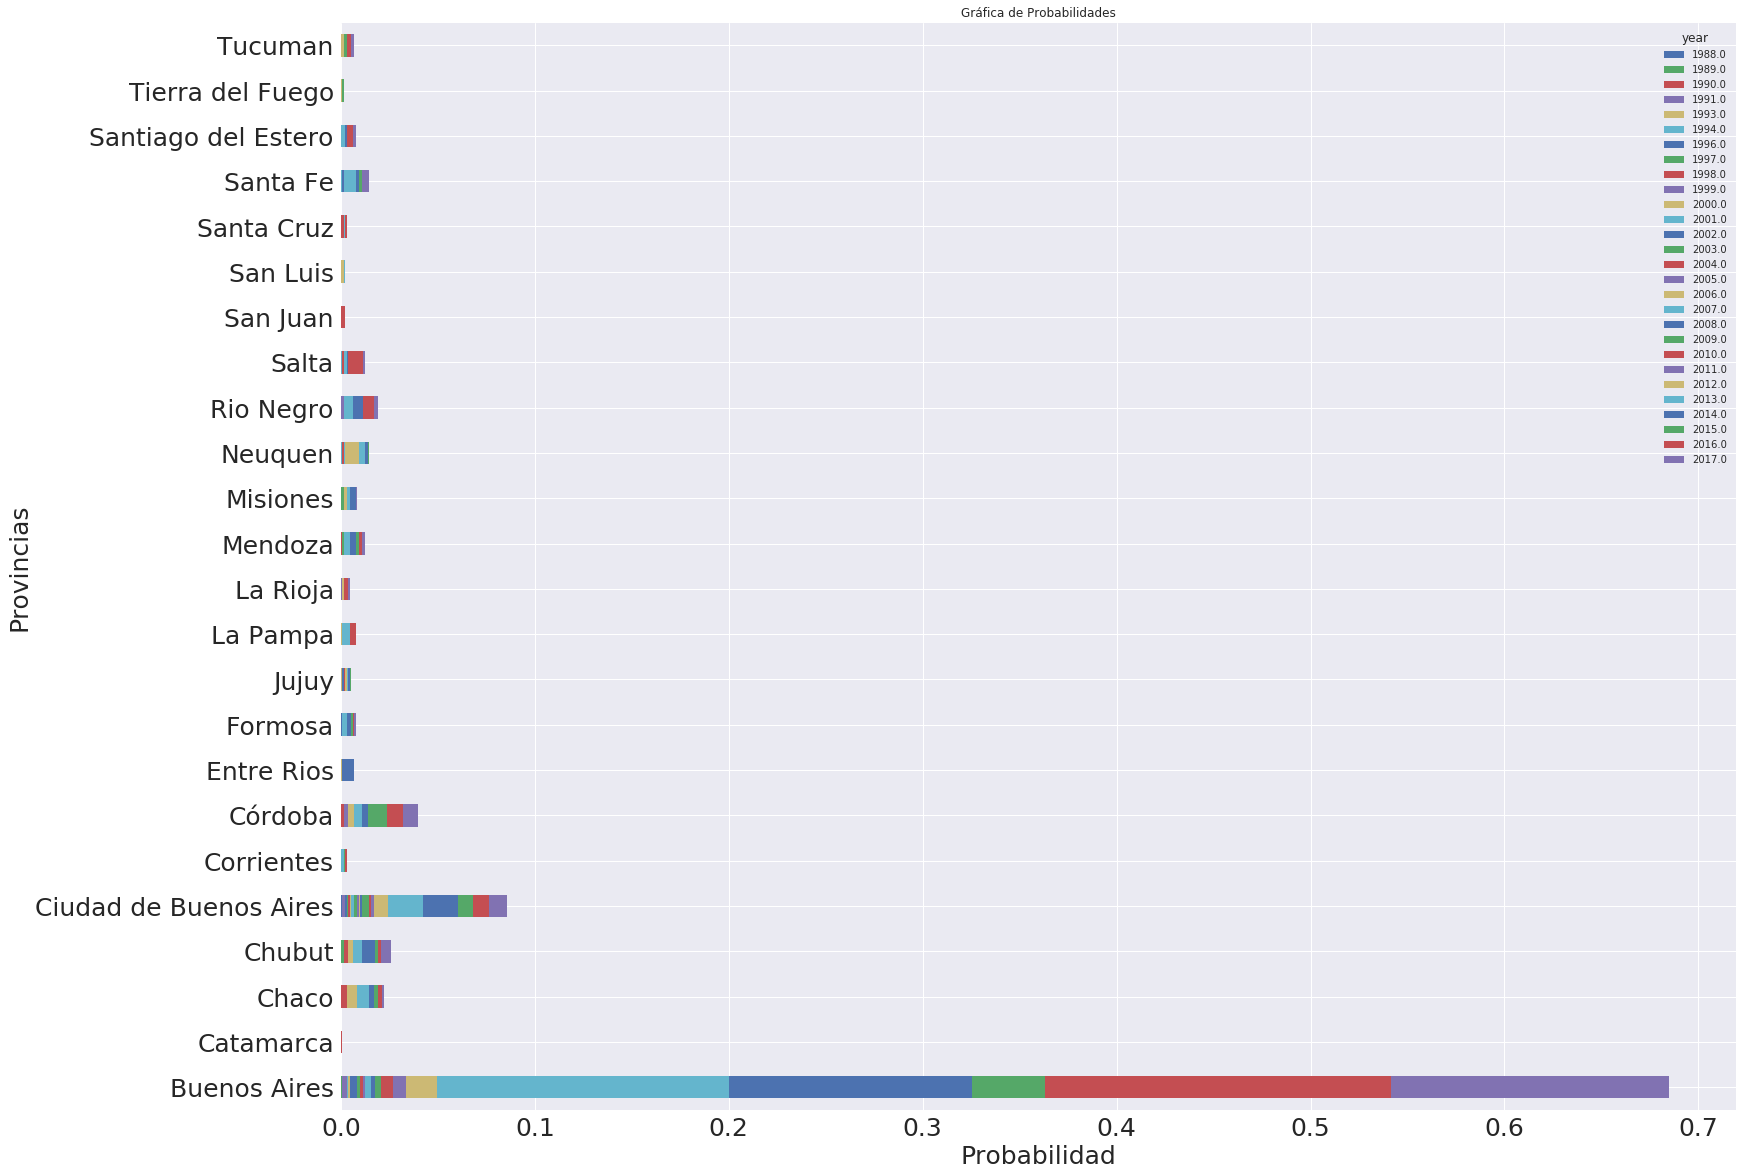

In [16]:
plt.figure()
plot = pandas.crosstab(index=dataset['provincia'],columns=dataset['year'],normalize=True).plot(
    kind='barh',stacked=True, title ="Gráfica de Probabilidades",figsize=(25, 20), legend=True, fontsize=25)
plot.set_xlabel("Probabilidad",fontsize=25)
plot.set_ylabel("Provincias",fontsize=25)
seaborn.despine()

#### El hecho de que la diferencia entre Buenos Aires con el resto de las provincias sea tan grande, hace que sea díficil poder representar toda la información en una misma gráfica. Por lo cual, se opto por un gráfico de barras horizontal con el parámetro stacked habilitado. Si bien sigue existiendo problemas de visualización, dentro de los posibles gráficos de barras, el elegido en este caso, logró el mejor resultado.

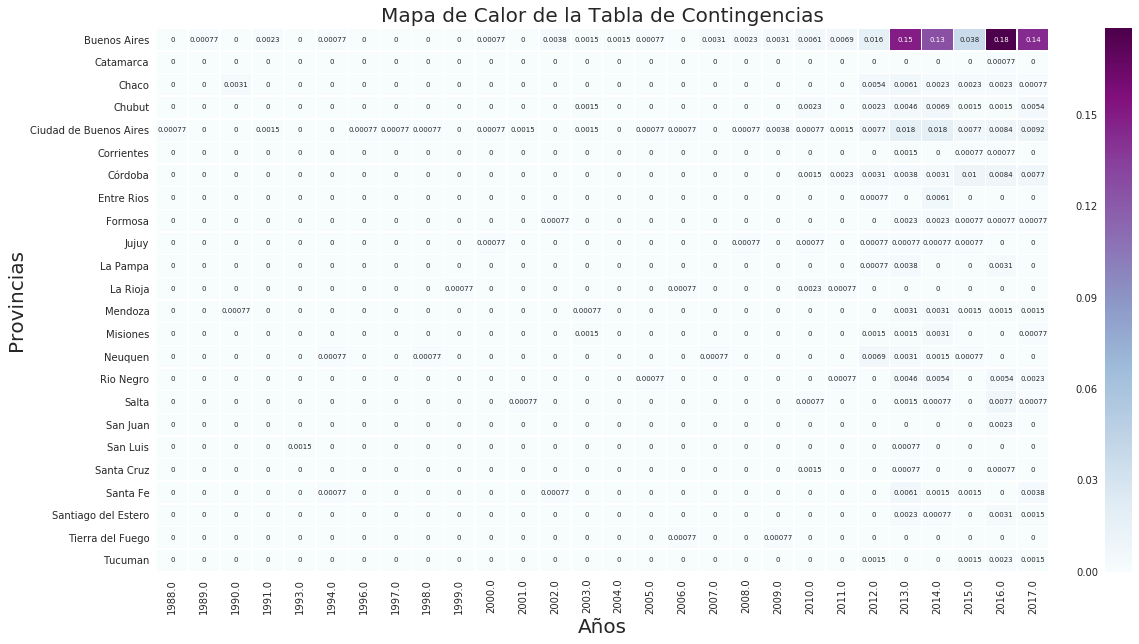

In [17]:
tabla_sin_margin = pandas.crosstab(index=dataset["provincia"], columns=dataset["year"],margins=False,normalize=True)
plt.figure(figsize=(20,10))
seaborn.heatmap(tabla_sin_margin,annot=True, annot_kws={"size": 7}, linewidths=.5, cmap="BuPu")
plt.xlabel("Años",fontsize=20)
plt.ylabel("Provincias",fontsize=20)
plt.title("Mapa de Calor de la Tabla de Contingencias",fontsize=20)
seaborn.despine()

#### Además se optó por un mapa de calor, donde si bien la cantidad de información es mucha se puede apreciar y comprender los datos que se están mostrando.

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [18]:
fdp_Z = dataset.contexto1.value_counts(normalize=True)
cantidad = len(dataset.contexto1.dropna())
print("Tabla de Frecuencia de Probabilidades:\n")
print("Contexto:     \t\t\t\t\t\t\t       Probabilidades:")
print(fdp_Z)

fdp_Z_1 = dataset[dataset.contexto1 == "Penal / Complejo Penitenciario PROVINCIAL"].contexto1.dropna().value_counts()[0]
fdp_Z_2 = dataset[dataset.contexto1 == "Penal / Complejo Penitenciario FEDERAL"].contexto1.dropna().value_counts()[0]
fdp_Z_3 = dataset[dataset.contexto1 == "Comisaría"].contexto1.dropna().value_counts()[0]
fdp_Z_4 = dataset[dataset.contexto1 == "Centros de Detención Previos al Juicio (Alcaidia)"].contexto1.dropna().value_counts()[0]
fdp_Z_5 = dataset[dataset.contexto1 == "Centros de Detención Preventiva"].contexto1.dropna().value_counts()[0]
fdp_Z_6 = dataset[dataset.contexto1 == "Instalaciones de la Gendarmería Nacional"].contexto1.dropna().value_counts()[0]
fdp_Z_7 = dataset[dataset.contexto1 == "Escuelas de Formación Fuerzas Provinciales"].contexto1.dropna().value_counts()[0]
fdp_Z_8 = dataset[dataset.contexto1 == "Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)"].contexto1.dropna().value_counts()[0]
fdp_Z_9 = dataset[dataset.contexto1 == "Escuelas de Formación Fuerzas Nacionales"].contexto1.dropna().value_counts()[0]
fdp_Z_10 = dataset[dataset.contexto1 == "Móviles y medios de transporte de Fuerzas de Seguridad"].contexto1.dropna().value_counts()[0]

probabilidad = (fdp_Z_1+fdp_Z_2+fdp_Z_3+fdp_Z_4+fdp_Z_5+fdp_Z_6+fdp_Z_7+fdp_Z_8+fdp_Z_9+fdp_Z_10)/cantidad
print("\n\n---------------------------------------------------------------------------------------------------------")
print("Probabilidad de que un hecho provenga de una dependencia de una fuerza de seguridad = "+str(probabilidad))

Tabla de Frecuencia de Probabilidades:

Contexto:     							       Probabilidades:
Penal / Complejo Penitenciario PROVINCIAL                              0.365343
Penal / Complejo Penitenciario FEDERAL                                 0.321300
Espacio Público                                                        0.153069
Comisaría                                                              0.091697
Domicilio Particular                                                   0.016606
Centros de Detención Previos al Juicio (Alcaidia)                      0.011552
Móviles y medios de transporte de Fuerzas de Seguridad                 0.009386
Lugar No Identificado                                                  0.008664
Establecimiento de Salud Mental                                        0.005054
Centros de Detención Preventiva                                        0.004332
Hospital General                                                       0.003610
Instalaciones de la Gendarmería Naci

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

In [19]:
print("\nCantidad total de entradas del dataset = 1440")

cuenta_psiquica = dataset.violencia_psiquica.value_counts().sum()
print("Cantidad total de eventos de violencia psíquica: "+str(cuenta_psiquica))

tabla_condicional = dataset.groupby('violencia_psiquica')['violencia_fisica'].value_counts()/dataset.groupby('violencia_psiquica')['violencia_fisica'].count()
tabla_condicional.to_csv('tabla_condicional.csv')

cuenta_fisica = dataset.violencia_fisica.value_counts().sum()
print("Cantidad total de eventos de violencia física: "+str(cuenta_fisica))

cuenta_condicional = tabla_condicional.value_counts().sum()
print("Cantidad total de eventos dada violencia psíquica, tambíen violencia física: "+str(cuenta_condicional))


Cantidad total de entradas del dataset = 1440
Cantidad total de eventos de violencia psíquica: 487
Cantidad total de eventos de violencia física: 590
Cantidad total de eventos dada violencia psíquica, tambíen violencia física: 67


### Se creó una tabla donde se muestra la probabilidad condicional dada la existencia de un tipo específico de violencia física, también haya existido violencia psíquica. La tabla es demasiado grande para ser vista completamente en ésta notebook, por ello se la exportó a un archivo llamado 'tabla_condicional.csv'

#### Si sólo nos centramos en obtener la probabilidad de que dada la existencia de cualquier tipo de violencia física, también haya existido cualquier tipo de violencia psíquica, la respuesta es:

$$ P(N \mid M) = \frac{P(N \cap M)}{P(M)}=\frac{\frac{67}{1440}}{\frac{590}{1440}}=0.113559$$

#### Si en cambio, analizamos la situación donde, dado un tipo específico de violencia psíquica, queremos hallar la probabilidad de que haya un tipo específico de violencia física, estamos ante otra situación y dichas probabilidades se encuentran plasmadas en la tabla del archivo 'tabla_condicional.csv'.

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?

#### Se desprende que existe una intersección  no vacía, entre los conjuntos $M$ y $N$. O dicho de otra forma:
$$ \exists\; x \in M \cap N : x \in M\;\; y\;\; x \in N$$


* ¿Podemos concluir en que son eventos independientes dadas las muestras?

#### Si los eventos fuesen independientes, entonces:
$$ P(N \mid M) = \frac{P(N \cap M)}{P(M)}=\frac{P(N) P(M)}{P(M)}=P(N)$$

#### Y la probabilidad de un evento de violencia psíquica es:
$$P(N)=\frac{487}{1440}=0.338194 \neq 0.113559$$

#### Por lo tanto los eventos $M$ y $N$ no son independientes (existe una intersección no vacía entre los conjuntos $M$ y $N$).